In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 
 'The Night Listener': 3.0},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0, 
 'You, Me and Dupree': 3.5}, 
'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0, 
 'You, Me and Dupree': 2.5},
'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0}, 
'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}


In [3]:
train = pd.DataFrame(critics).T

In [4]:
train

,Just My Luck,Lady in the Water,Snakes on a Plane,Superman Returns,The Night Listener,"You, Me and Dupree"
Claudia Puig,3.0,NaN,3.5,4.0,4.5,2.5
Gene Seymour,1.5,3.0,3.5,5.0,3.0,3.5
Jack Matthews,NaN,3.0,4.0,5.0,3.0,3.5
Lisa Rose,3.0,2.5,3.5,3.5,3.0,2.5
Michael Phillips,NaN,2.5,3.0,3.5,4.0,NaN
Mick LaSalle,2.0,3.0,4.0,3.0,3.0,2.0
Toby,NaN,NaN,4.5,4.0,NaN,1.0


上述数据给出了7个不同的人分别对六部电影的打分情况，有部分没有过打分。  
接下来会进行简单的协同过滤算法演示

#### 寻找相近的用户

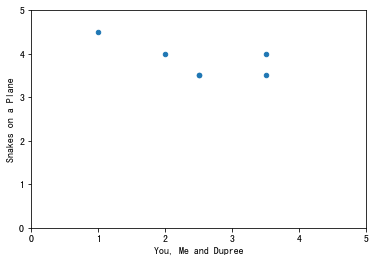

In [5]:
train.plot.scatter(y='Snakes on a Plane', x='You, Me and Dupree', xlim=(0,5), ylim=(0,5))

如上，可以看到用户之前的相似情况，两个点越近，表明用户之间的关系越相近。可以使用平方和来计算两个用户之间的相似度，值越小，表明越相近。取导数，可以从大到小排序。

In [6]:
def sim_distance(perfs, p1, p2):
    si = {}
    for item in perfs[p1]:
        if item in perfs[p2]:
            si[item] = 1
    if len(si) == 0: return 0
    sum_of_squares = np.sum([pow(perfs[p1][item] - perfs[p2][item], 2) 
                             for item in perfs[p1] if item in perfs[p2]])
    
    return 1 / (1 + np.sqrt(sum_of_squares))
sim_distance(critics, 'Claudia Puig', 'Gene Seymour')

0.28172904669025317

In [7]:
train.loc['Claudia Puig']['Just My Luck']  # 访问某个元素

3.0

除了用欧几里得距离，还可以使用皮尔逊相关系数来衡量相似度，在数据不是很规范的时候给出较好的结果。

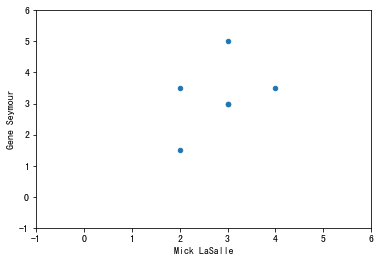

In [8]:
pd.DataFrame(critics).plot.scatter(x='Mick LaSalle', y='Gene Seymour', xlim=(-1,6), ylim=(-1,6))

如上图， 如果所有点能较好的拟合出一条直线，则表明两个用户之间的相似度越大。

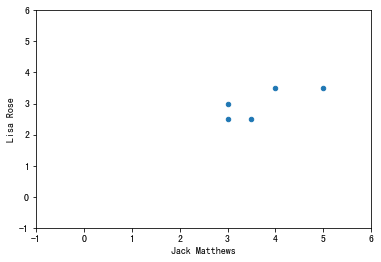

In [9]:
pd.DataFrame(critics).plot.scatter(x='Jack Matthews', y='Lisa Rose', xlim=(-1,6), ylim=(-1,6))

下面两个用户之间更相似, 其计算方法为X,Y的协方差除以X的标准差与Y的标准差之间的乘积。

如上函数可以计算两个不同用户之间的相似程度。因此，可以根据上面数据构造用户相似矩阵。

In [10]:
def sim_d1(train, i, j):
    # 欧几里得距离
    return 1 / (1 + np.sqrt(np.sum(np.power(train.iloc[i] - train.iloc[j], 2))))

In [71]:
def sim_d2(train, i, j):
    x = train.iloc[i]
    y = train.iloc[j]
    cov = np.mean((x - np.mean(x)) * (y - np.mean(y)))
    var_x = np.std(x)
    var_y = np.std(y)
    return cov / (var_x * var_y)  

In [77]:
# pandas可以使用corr()函数来计算其相关性
corr = train.T.corr()
corr

,Claudia Puig,Gene Seymour,Jack Matthews,Lisa Rose,Michael Phillips,Mick LaSalle,Toby
Claudia Puig,1.000000,0.314970,0.028571,0.566947,1.000000,0.566947,0.893405
Gene Seymour,0.314970,1.000000,0.963796,0.396059,0.204598,0.411765,0.381246
Jack Matthews,0.028571,0.963796,1.000000,0.747018,0.134840,0.211289,0.662849
Lisa Rose,0.566947,0.396059,0.747018,1.000000,0.404520,0.594089,0.991241
Michael Phillips,1.000000,0.204598,0.134840,0.404520,1.000000,-0.258199,-1.000000
Mick LaSalle,0.566947,0.411765,0.211289,0.594089,-0.258199,1.000000,0.924473
Toby,0.893405,0.381246,0.662849,0.991241,-1.000000,0.924473,1.000000


如上图计算得到用户之间的相似度矩阵，下面就可以根据这个矩阵去推荐电影。简单来书，比如要为Toby推荐电影，可以看到与List Rose之间的相关性最高，可以从其评分过的电影选择一部给Toby。但是对于未评分的电影也有可能是toby喜欢的，因此需要一个经过加权的值来衡量。

In [213]:
toby_not_null = [i for i in train.columns if train[i]['Toby'] >= 0]  # 选择某一行中不为nan的列名

In [281]:
# 获得某一用户未评分的相关性矩阵
def sim_weighting(person):
    columns = [i for i in train.columns if np.isnan(train[i][person])]
    temp = corr[[person]].join(train[columns])
    return temp[(temp[person] > 0) & (temp[person] < 1)]
person = "Toby"
toby_sim = sim_weighting(person)
toby_sim

,Toby,Just My Luck,Lady in the Water,The Night Listener
Claudia Puig,0.893405,3.0,NaN,4.5
Gene Seymour,0.381246,1.5,3.0,3.0
Jack Matthews,0.662849,NaN,3.0,3.0
Lisa Rose,0.991241,3.0,2.5,3.0
Mick LaSalle,0.924473,2.0,3.0,3.0


如上图，针对Toby为打过分的三个电影可以得到以上矩阵，第一列为相关系数，后三列为其他用户对该电影的评分，分别对其进行相乘。

In [282]:
toby_sim['sum_just'] = toby_sim['Toby'] * toby_sim['Just My Luck']
toby_sim['sum_Lady'] = toby_sim['Toby'] * toby_sim['Lady in the Water']
toby_sim['sum_Night'] = toby_sim['Toby'] * toby_sim['The Night Listener']

In [283]:
toby_sim

,Toby,Just My Luck,Lady in the Water,The Night Listener,sum_just,sum_Lady,sum_Night
Claudia Puig,0.893405,3.0,NaN,4.5,2.680215,NaN,4.020323
Gene Seymour,0.381246,1.5,3.0,3.0,0.571870,1.143739,1.143739
Jack Matthews,0.662849,NaN,3.0,3.0,NaN,1.988547,1.988547
Lisa Rose,0.991241,3.0,2.5,3.0,2.973722,2.478102,2.973722
Mick LaSalle,0.924473,2.0,3.0,3.0,1.848947,2.773420,2.773420


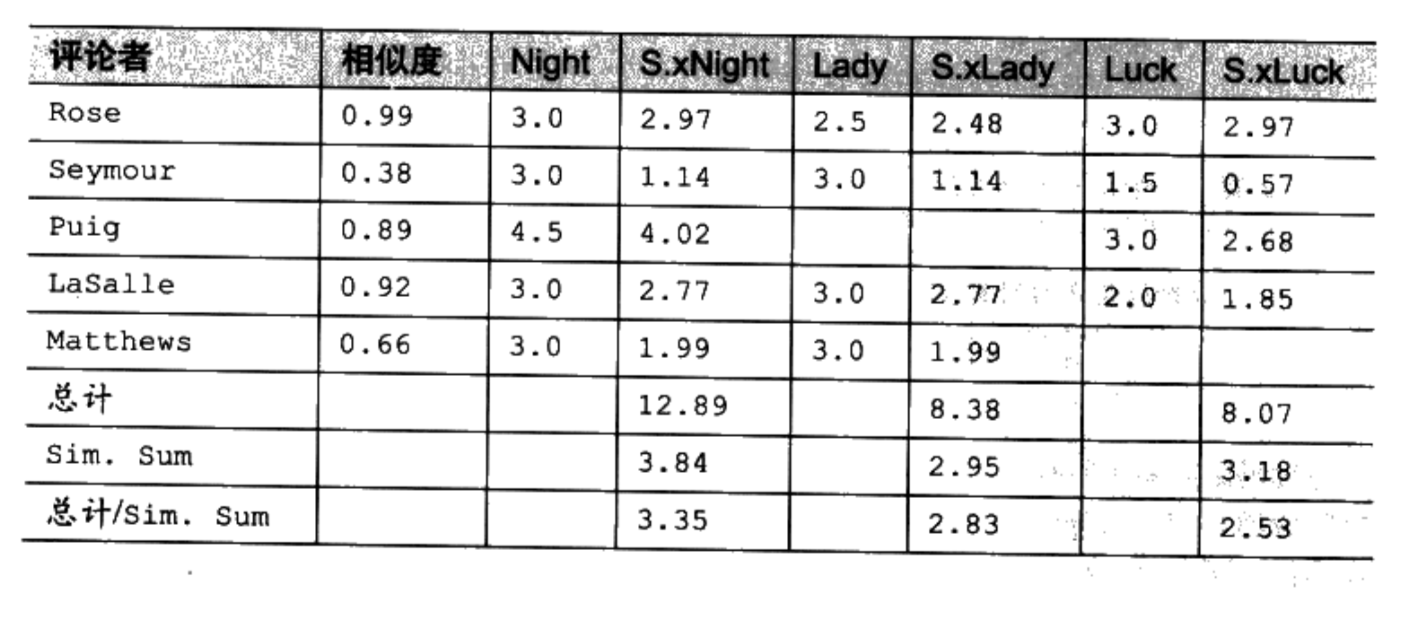
关注最后一行，得到所有相似度乘以电影评分权重的值，可以使用总计值来计算排名，同时也要注意到一部受到更多人评分的电影，对结果影响会很大， 因此需要除以对电影评分过的人的相似度之和。

有了以上数据，就可以知道toby对为看过的电影的加权评价值，对Night电影的评价值最高，因此可以向toby推荐该电影。  
这就是基于用户的协同过滤算法，通过衡量人之间的相似度，找到为看过的电影中加权评价值最高的电影进行推荐。

### 匹配电影

通过了解哪些电影是彼此相近的，与上面的做法相反，进行推荐。

In [310]:
train

,Just My Luck,Lady in the Water,Snakes on a Plane,Superman Returns,The Night Listener,"You, Me and Dupree"
Claudia Puig,3.0,NaN,3.5,4.0,4.5,2.5
Gene Seymour,1.5,3.0,3.5,5.0,3.0,3.5
Jack Matthews,NaN,3.0,4.0,5.0,3.0,3.5
Lisa Rose,3.0,2.5,3.5,3.5,3.0,2.5
Michael Phillips,NaN,2.5,3.0,3.5,4.0,NaN
Mick LaSalle,2.0,3.0,4.0,3.0,3.0,2.0
Toby,NaN,NaN,4.5,4.0,NaN,1.0


In [311]:
sim_item = train.corr()

In [312]:
sim_item

,Just My Luck,Lady in the Water,Snakes on a Plane,Superman Returns,The Night Listener,"You, Me and Dupree"
Just My Luck,1.000000,-0.944911,-0.333333,-0.422890,0.555556,-0.485662
Lady in the Water,-0.944911,1.000000,0.763763,0.487950,-0.612372,0.333333
Snakes on a Plane,-0.333333,0.763763,1.000000,0.111803,-0.566352,-0.645497
Superman Returns,-0.422890,0.487950,0.111803,1.000000,-0.179847,0.657952
The Night Listener,0.555556,-0.612372,-0.566352,-0.179847,1.000000,-0.250000
"You, Me and Dupree",-0.485662,0.333333,-0.645497,0.657952,-0.250000,1.000000


如上图就是不同电影间的相似情况。在这种情况下，可以通过查看人喜欢特定的电影，根据电影的相似情况进行推荐，与上面的用户和电影进行对换即可。